# Welcome to week 3 of your PAMD computer labs.

In this week's session, we will implement different linear regression models and evaluate their output. We will use the California Housing dataset in scikit learn for that purpose.

Have a look at the dataset documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) to familiarise yourself with the variables.

In [101]:
import sklearn.datasets as ds

df = ds.fetch_california_housing(as_frame=True)

In [102]:
# Let's start by printing us a summary of the dataset description.
print(df.DESCR)

import pandas as pd

print(df.keys())

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [103]:
# Creating DataFrame for features
df_features = pd.DataFrame(df["data"], columns=df["feature_names"])

# Creating DataFrame for target
df_target = pd.DataFrame(df["target"], columns=df["target_names"])

# Concatenating the two DataFrames along the columns
df = pd.concat([df_features, df_target], axis=1)

# Task 1 - Descriptive statistics and visualisation

The dataset provides us with a pre-defined target variable ('target') which is the average house value in units of $100,000. We will build a linear regression model trying to explain and also predict this value. The dataset also pre-defines the 8 variables we can use as predictors as ('data').

Start your analysis by familiarising yourself with the target variable and the predictors. You can create descriptive statistics or plots to visualise them.

A quick way of creating some descriptive statistics for your data is using the pandas [describe() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). It takes a pandas dataframe object and gives you a summary statistic for that dataframe. You can also use any of the functions we've learned over the past few weeks to calculate descriptive statistics instead.

In [104]:
df_features.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [105]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [106]:
df_target.describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


## visualization

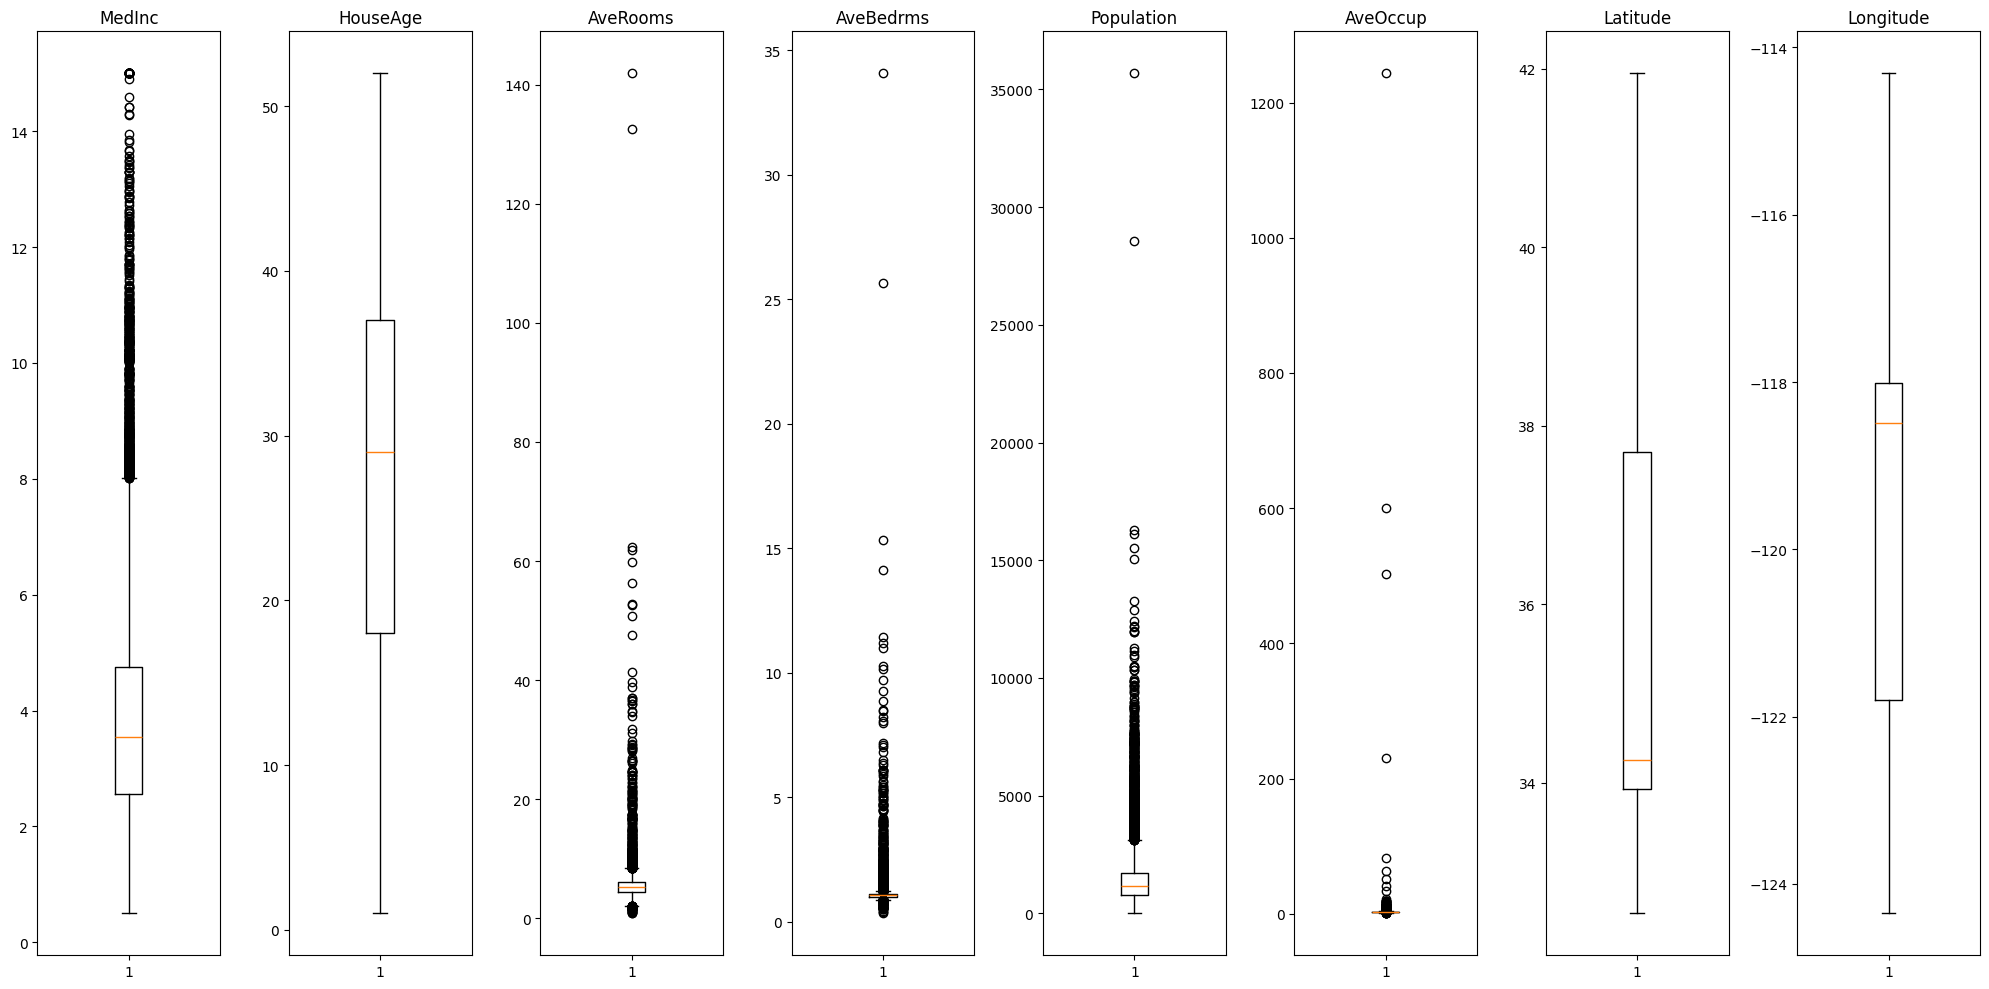

In [107]:
import matplotlib.pyplot as plt

# Number of features
num_features = df_features.shape[1]

# Creating subplots for each feature
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(20, 10))

# Looping through each feature and plot the boxplot
for i, col_name in enumerate(df_features.columns):
    axes[i].boxplot(df_features[col_name])
    axes[i].set_title(col_name)

# Displaying the plots
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure area.
plt.show()

# Task 2 - Simple linear regression

Now it's time to build a simple linear regression model. The objective is to explain the variable 'target' (our y) through just one of the available predictors. You can choose any one of them, such as 'MedInc' (our x).

Use the sklearn function LinearRegression() to build your model. You can find the documentation for that [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Tip: Double check which format the model would like the data input to be in. Then use the fit() method in the package. Don't worry too much about optional parameters like weights for now, try to create the most simple model first.

In [108]:
from sklearn.linear_model import LinearRegression

# import numpy as np

# np.random.seed(0)
print(df_target.shape)
print(df_features["MedInc"].shape)

linear_model = LinearRegression()
X = df_features["MedInc"].values.reshape(-1, 1)
Y = df_target.values.reshape(-1, 1)
linear_model.fit(X, Y)


(20640, 1)
(20640,)


LinearRegression()

Try plotting the results of your model. You can do so, for example, with the scatter() function in the matplotlib library. Plot your x values and known y values first. Then you can overlay that with a plot of your predicted y values. Try out some different visualisations if you want to.

Tip: The LinearRegression fit() function we used above estimates your parameters (the betas). Then you can use the predict() function to derive estimations for y-hat. Save these estimations in their own vector to plot them.

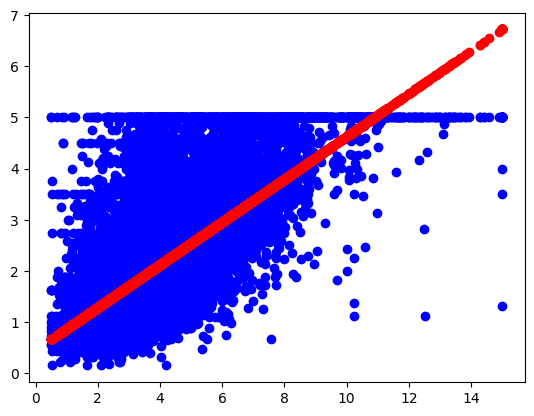

In [109]:
plt.scatter(X, Y, color="blue")
predicted_values = linear_model.predict(X)
plt.scatter(X, predicted_values, color="red")
plt.show()

You can have a look at your linear regression object in more detail. For example, try printing your coefficients using the  LinearRegression().coef_ function. You can also print your intercept using LinearRegression().intercept_

In [110]:
# 查看模型参数
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# 打印参数
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
from sklearn.metrics import mean_squared_error

# 计算MSE
mse = mean_squared_error(Y, predicted_values)

# 将MSE乘以样本数量得到SSE
sse = mse * len(Y)

print(f"Sum of Squared Errors (SSE): {sse}")

Coefficients: [[0.41793849]]
Intercept: [0.45085577]
Sum of Squared Errors (SSE): 14471.346942046544


# Task 3 - Multiple linear regression

Similarly as above, try recreating the same model but this time include multiple columns of X. You can choose just a few of them or try including all.

You can use the sklearn function LinearRegression() which we used above again. It works well with multiple predictors.

However, one disadvantage of the sklearn model is that there is limited in-built functionalities to create a quick overview summary of the model. This is because sklearn is mostly focused on predictive modelling, so, it's more interested in giving us accurate y-hats instead of telling us a lot of small details about the model fit.

An alternative popular package which does have a good summary function is the one in statsmodels, with documentation [here](https://www.statsmodels.org/stable/regression.html). I will use that instead this time to be able to print a summary of the model performance, but the sklearn one would work just as fine. Use whichever you feel more comfortable.

If you want to try out the statsmodel version, use the [OLS estimation](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html). OLS stands for Ordinary Least Squares, and it's a type of least squares estimation as we've covered during the lecture.

In [111]:
linear_model = LinearRegression()
X = df_features.values
Y = df_target.values
linear_model.fit(X, Y)
predicted_values = linear_model.predict(X)

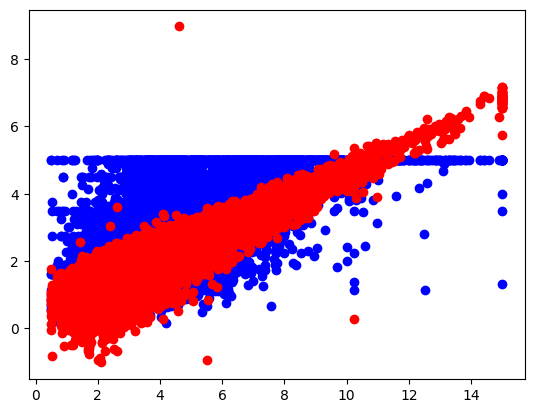

In [112]:
X = df_features["MedInc"].values.reshape(-1, 1)
Y = df_target.values.reshape(-1, 1)

plt.scatter(X, Y, color="blue")
plt.scatter(X, predicted_values, color="red")
plt.show()

In [113]:
# 计算MSE
mse = mean_squared_error(Y, predicted_values)

# 将MSE乘以样本数量得到SSE
sse = mse * len(Y)

print(f"Sum of Squared Errors (SSE): {sse}")

Sum of Squared Errors (SSE): 10821.985154850292
